# **Loading Dataset and Importing Modules**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# print(os.getcwd())

/content


In [ ]:
# target_dir='/content/drive/MyDrive/Colab Notebooks'
# os.chdir(target_dir)
# print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks


In [ ]:
bike_df=pd.read_csv('train.csv')
testing_bike_df=pd.read_csv('test.csv')
bike_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,2012-12-20,4,1,12,19,0,4,1,3,0.34,0.3182,0.71,0.2537,118
11456,2012-12-20,4,1,12,20,0,4,1,3,0.34,0.3333,0.76,0.1642,50
11457,2012-12-20,4,1,12,21,0,4,1,3,0.34,0.3333,0.76,0.1642,26
11458,2012-12-20,4,1,12,22,0,4,1,3,0.34,0.3333,0.87,0.1940,21


In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11460 entries, 0 to 11459
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      11460 non-null  object 
 1   season      11460 non-null  int64  
 2   yr          11460 non-null  int64  
 3   mnth        11460 non-null  int64  
 4   hr          11460 non-null  int64  
 5   holiday     11460 non-null  int64  
 6   weekday     11460 non-null  int64  
 7   workingday  11460 non-null  int64  
 8   weathersit  11460 non-null  int64  
 9   temp        11460 non-null  float64
 10  atemp       11460 non-null  float64
 11  hum         11460 non-null  float64
 12  windspeed   11460 non-null  float64
 13  cnt         11460 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.2+ MB


In [ ]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

def clean_and_encode_data(dataframe):
  #Drop irrelevant columns
  dataframe=dataframe.drop(['dteday','yr'],axis=1)
  dataframe=dataframe.drop(['atemp'],axis=1)

  #Change the int64 column into catagory column
  cols=['season','weathersit','holiday','hr','mnth','workingday']
  for col in cols:
    dataframe[col]=dataframe[col].astype('category')

  #Assign all catagoriacla features to a variable
  categorical_features=list(dataframe.select_dtypes(['object','category']).columns)
  categorical_features
  categorical_features=pd.Index(categorical_features)


  #create a copy
  dataframe_copy = dataframe
  for col in categorical_features:
    dataframe_copy = one_hot_encoding(dataframe_copy, col)

  return dataframe_copy


bike_df_copy = clean_and_encode_data(bike_df)
testing_bike_df_copy=clean_and_encode_data(testing_bike_df)

bike_df_copy.head()

,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,...,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,6,0.24,0.81,0.0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0.22,0.80,0.0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0.22,0.80,0.0,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0.24,0.75,0.0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0.24,0.75,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataframe=bike_df.drop(['dteday','yr'],axis=1)
# dataframe=dataframe.drop(['atemp'],axis=1)
# dataframe
# cols=['season','weathersit','holiday','hr','mnth','workingday']
# for col in cols:
#   dataframe[col]=dataframe[col].astype('category')
# #Assign all catagoriacla features to a variable
# categorical_features=list(dataframe.select_dtypes(['object','category']).columns)
# categorical_features=pd.Index(categorical_features)
# categorical_features

##**Normalise Rented_Bike_Count column data**

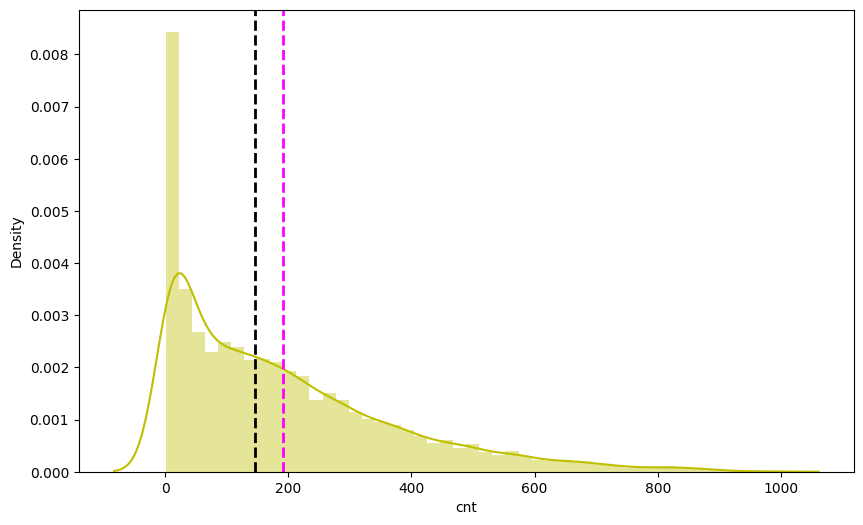

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('cnt')
plt.ylabel('Density')
ax=sns.distplot(bike_df_copy['cnt'],hist=True ,color="y")
ax.axvline(bike_df_copy['cnt'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df_copy['cnt'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

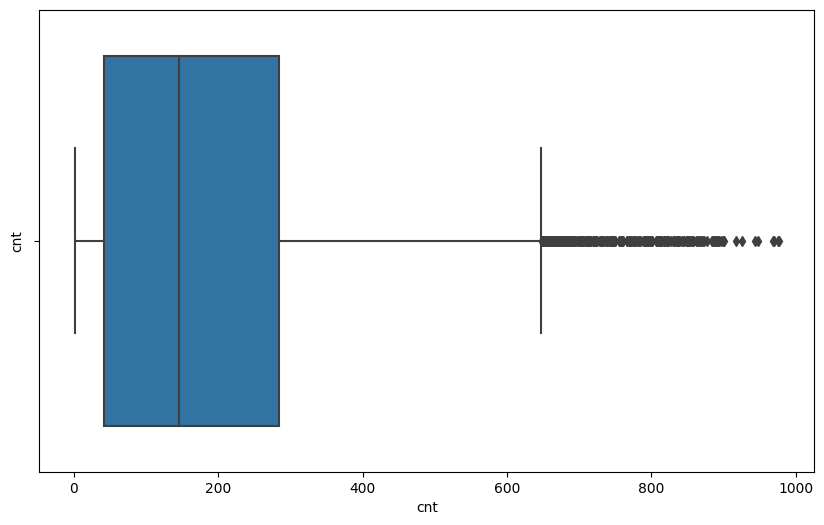

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('cnt')
sns.boxplot(x=bike_df_copy['cnt'])
plt.show()

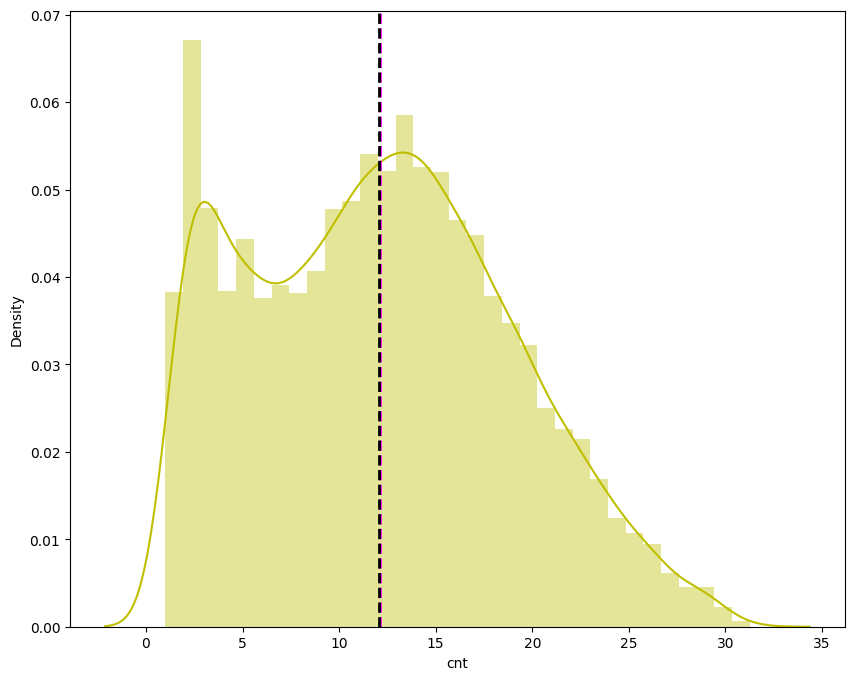

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df_copy['cnt']), color="y")
ax.axvline(np.sqrt(bike_df_copy['cnt']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df_copy['cnt']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

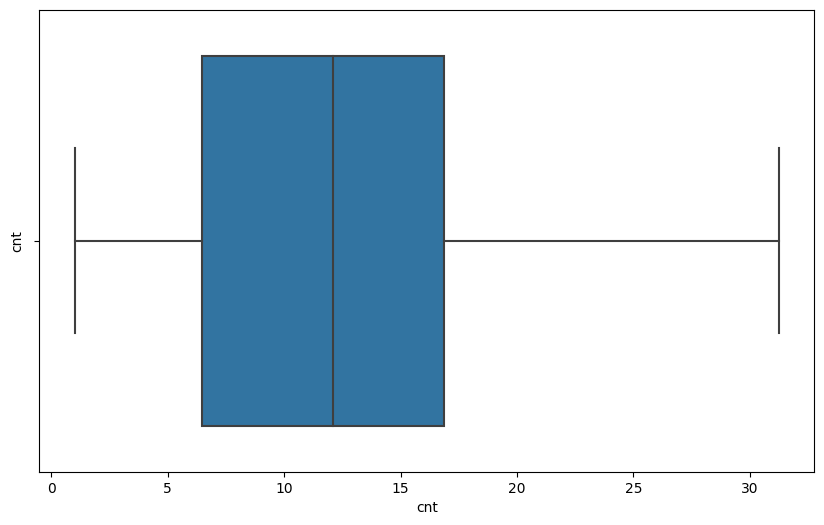

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('cnt')
sns.boxplot(x=np.sqrt(bike_df_copy['cnt']))
plt.show()

#**Model Training**

##**Train Test split for regression**

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['cnt'], axis=1)
y = np.sqrt(bike_df_copy['cnt'])

#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

print(X_train.shape)
print(X_test.shape)


(8595, 46)
(2865, 46)


# **LINEAR REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

reg= lin_reg.fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7481269575267679

In [ ]:
#check the coefficeint
reg.coef_

array([ 0.10894976,  9.95351702, -3.42751895, -1.90802266,  1.29495287,
        0.84615978,  2.20805736,  0.42921159,  0.73795795,  0.20944427,
        1.02282107,  0.06268753, -0.45177206, -0.04188383,  1.33981568,
        0.78851852,  0.76192515,  0.65761369, -1.64449592, -2.58208896,
       -3.66424879, -4.01855943, -2.16934017,  1.71235126,  7.10959173,
       11.05098393,  7.50682199,  5.31364662,  6.1773949 ,  7.25509583,
        7.32966986,  6.45913838,  6.97435059,  8.91424215, 12.68170391,
       12.04443453,  9.43691322,  6.88506845,  5.37719052,  4.02347346,
        2.11808912,  0.05629014, -0.0699338 , -0.19149546, -2.56460711,
       -1.4633526 ])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)

y_pred_testing=reg.predict(testing_bike_df_copy)

# Create a DataFrame with 'dteday' and 'cnt' columns for the test predictions
test_results = pd.DataFrame(
{
        'date_time': pd.to_datetime(testing_bike_df['dteday'] + ' ' + testing_bike_df['hr'].astype(str) + ':00:00'),
        'cnt': y_pred_testing
})
pd.DataFrame(test_results).reset_index().to_csv('submission.csv',  index=False)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.326046991292586
RMSE : 3.3654192890771553
MAE : 2.608032527568413
R2 : 0.7481269575267679
Adjusted R2 : 0.744015474221669
